In [3]:
import numpy as np
import pandas as pd

miami = pd.read_csv('miami.csv')
miami.head()

miami.describe()

miami.dtypes

miami.drop('Unnamed: 0', axis = 1, inplace = True)

miami.price = [x.strip('$') for x in miami.price]

In [5]:
miami.price = [x.replace(',','') for x in miami.price]

In [6]:
miami.price.astype(float)

miami.apply(lambda x: sum(x.isnull()), axis=0)

cat_type = pd.api.types.CategoricalDtype(categories=[0,1,2,3,4,5],ordered=True)
miami.bedroom.astype(cat_type)

0      1
1      1
2      0
3      1
4      2
5      1
6      1
7      2
8      1
9      1
10     1
11     1
12     1
13     0
14     2
15     1
16     2
17     1
18     1
19     1
20     1
21     1
22     3
23     2
24     1
25     0
26     0
27     1
28     1
29     1
      ..
152    1
153    1
154    2
155    3
156    4
157    1
158    2
159    3
160    1
161    1
162    2
163    1
164    1
165    0
166    2
167    1
168    1
169    1
170    1
171    1
172    1
173    1
174    1
175    0
176    0
177    1
178    1
179    0
180    0
181    0
Name: bedroom, Length: 182, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [12]:
miami.head()

,price,reviews,rating,accommodates,extpeop,savwish,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds
0,70,45,4.5,2,0,934,3,3.704471,1,0,0,0,1,1,1
1,100,13,5.0,3,0,171,5,3.355278,1,0,1,1,1,1,1
2,90,0,NaN,4,1,0,1,2.962161,0,0,0,0,0,1,1
3,125,20,4.0,4,0,460,7,2.139501,0,1,0,0,1,1,2
4,99,10,5.0,6,0,589,1,3.628548,1,1,1,1,2,2,3


In [7]:
miami.bathroom = miami['bathroom'].astype('category')
miami.rating = miami['rating'].astype('category')
miami.min_stay = miami['min_stay'].astype('category')
miami.secdep = miami['secdep'].astype('category')
miami.cleanfee = miami['cleanfee'].astype('category')
miami.weekfee = miami['weekfee'].astype('category')
miami.monthfee = miami['monthfee'].astype('category')
miami.bedroom = miami['bedroom'].astype('category')
miami.beds = miami['beds'].astype('category')
miami.extpeop = miami['extpeop'].astype('category')

miami.reviews = miami['reviews'].astype('int32')


price             object
reviews            int32
rating          category
accommodates       int64
extpeop         category
savwish            int64
min_stay        category
sentiment        float64
secdep          category
cleanfee        category
weekfee         category
monthfee        category
bedroom         category
bathroom        category
beds            category
dtype: object

In [16]:
miami.price = miami.price.astype(float)

In [17]:
miami.dtypes

price            float64
reviews            int32
rating          category
accommodates       int64
extpeop         category
savwish            int64
min_stay        category
sentiment        float64
secdep          category
cleanfee        category
weekfee         category
monthfee        category
bedroom         category
bathroom        category
beds            category
dtype: object

In [18]:
indexRow = [ miami[ miami['sentiment'].isna() & miami['rating'].isna() &  (miami['reviews'] == 0)  ].index ]
indexRow
newMiami = miami.drop(miami.index[indexRow])


newMiami = newMiami.reset_index()

In [ ]:
## Replacing zeros with median revenue

val = newMiami.reviews.median()
#print(val)
newMiami.reviews = newMiami.reviews.apply(lambda x: val if x == 0 else x)


In [50]:
newMiami.min_stay = newMiami['min_stay'].astype('int32')
newMiami['revenue'] = 0.12 * newMiami['reviews'] * newMiami['min_stay'] * newMiami['price']

In [51]:
newMiami.head()

,price,reviews,rating,accommodates,extpeop,savwish,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,revenue
0,70.0,45.0,4.5,2,0,934,3,3.704471,1,0,0,0,1,1,1,1134.0
1,100.0,13.0,5.0,3,0,171,5,3.355278,1,0,1,1,1,1,1,780.0
2,90.0,10.0,4.5,4,1,0,1,2.962161,0,0,0,0,0,1,1,108.0
3,125.0,20.0,4.0,4,0,460,7,2.139501,0,1,0,0,1,1,2,2100.0
4,99.0,10.0,5.0,6,0,589,1,3.628548,1,1,1,1,2,2,3,118.8


In [23]:

newMiami.drop(['index'], axis = 1, inplace = True)

In [25]:
newMiami.rating = newMiami['rating'].astype(float)

In [42]:
newMiami.rating = newMiami.rating.fillna(newMiami.rating.median())

10.0


In [27]:
newMiami.dtypes

price            float64
reviews            int32
rating           float64
accommodates       int64
extpeop         category
savwish            int64
min_stay           int32
sentiment        float64
secdep          category
cleanfee        category
weekfee         category
monthfee        category
bedroom         category
bathroom        category
beds            category
revenue          float64
dtype: object

In [28]:
import seaborn as sns
sns.pairplot(newMiami)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f1f2d30>,
      dtype=object)

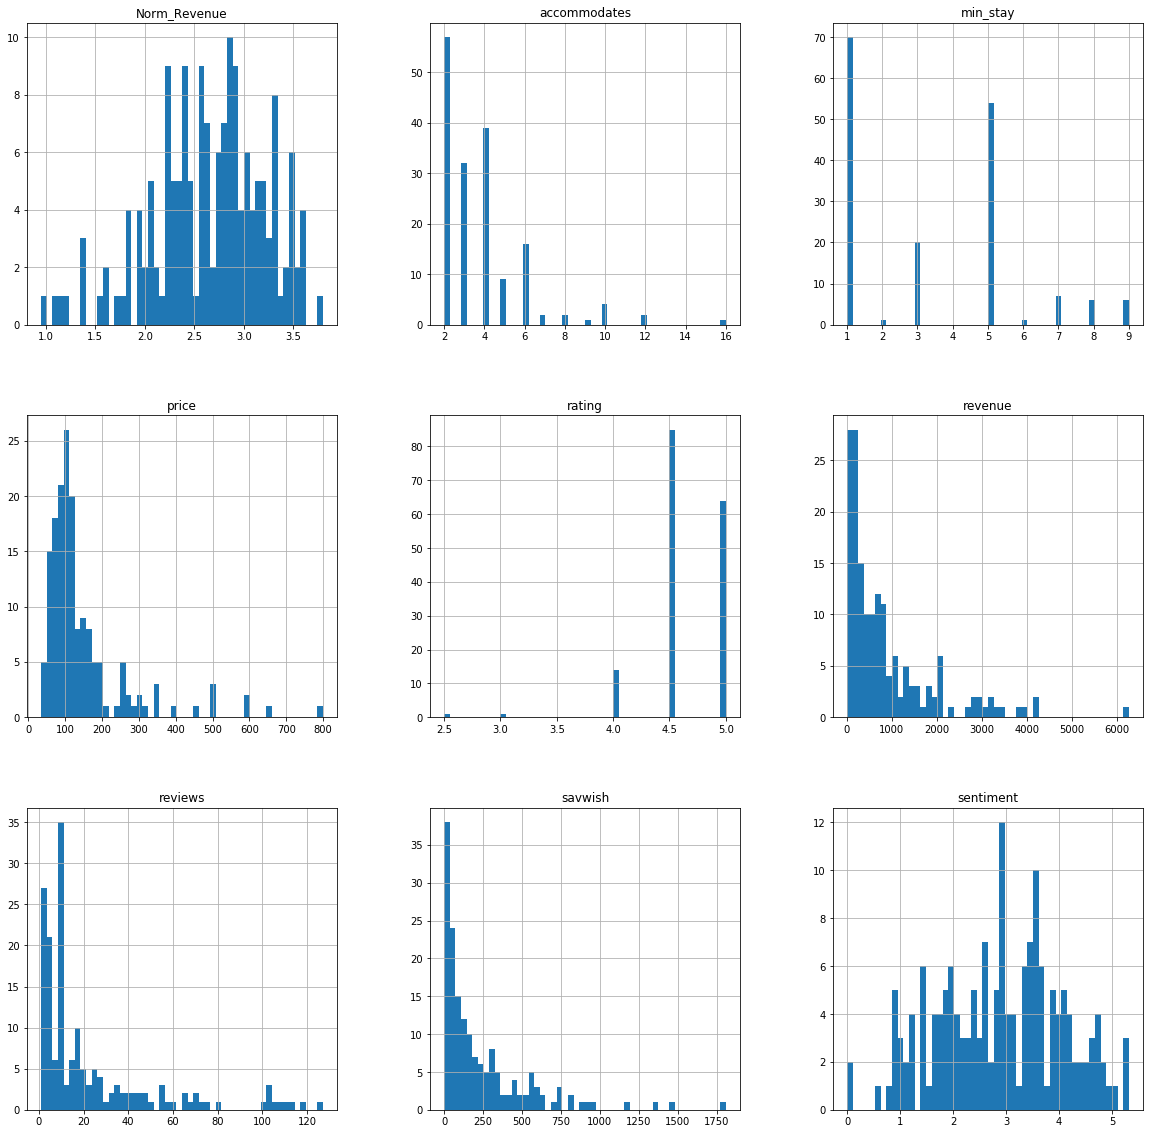

In [61]:
newMiami.hist(bins=50, figsize=(20,20))


Text(0, 0.5, 'reviews')

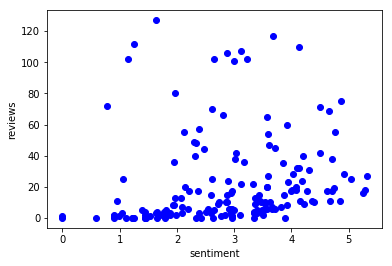

In [36]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot( newMiami.sentiment,newMiami.reviews, 'o', color='blue')
plt.xlabel('sentiment')
plt.ylabel('reviews')

In [58]:
## Normalization of revenue

from sklearn import preprocessing

#rev = [newMiami['revenue']]
#newMiami['revenue'] = preprocessing.normalize([newMiami.revenue])


names = newMiami.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(newMiami)
scaled_df = pd.DataFrame(scaled_df, columns=names)

TypeError: '<' not supported between instances of 'CategoricalDtype' and 'CategoricalDtype'

In [59]:
newMiami.head()

,price,reviews,rating,accommodates,extpeop,savwish,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,revenue
0,70.0,45.0,4.5,2,0,934,3,3.704471,1,0,0,0,1,1,1,1134.0
1,100.0,13.0,5.0,3,0,171,5,3.355278,1,0,1,1,1,1,1,780.0
2,90.0,10.0,4.5,4,1,0,1,2.962161,0,0,0,0,0,1,1,108.0
3,125.0,20.0,4.0,4,0,460,7,2.139501,0,1,0,0,1,1,2,2100.0
4,99.0,10.0,5.0,6,0,589,1,3.628548,1,1,1,1,2,2,3,118.8


In [60]:
newMiami['Norm_Revenue'] = np.log10(newMiami.revenue)

In [87]:
y = newMiami.Norm_Revenue

In [104]:
corr = newMiami.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,reviews,rating,accommodates,savwish,min_stay,sentiment,revenue,Norm_Revenue
price,1,-0.312346,-0.182003,0.644212,-0.224548,0.195903,-0.075822,0.209298,0.237619
reviews,-0.312346,1,0.0759569,-0.178825,0.674473,-0.240123,0.137882,0.389324,0.43686
rating,-0.182003,0.0759569,1,-0.102754,0.0899236,0.122406,0.364351,0.215652,0.132695
accommodates,0.644212,-0.178825,-0.102754,1,-0.00697343,0.200159,0.0458528,0.205083,0.229627
savwish,-0.224548,0.674473,0.0899236,-0.00697343,1,-0.140918,0.142882,0.375639,0.397879
min_stay,0.195903,-0.240123,0.122406,0.200159,-0.140918,1,0.0652534,0.47548,0.524222
sentiment,-0.075822,0.137882,0.364351,0.0458528,0.142882,0.0652534,1,0.232977,0.310676
revenue,0.209298,0.389324,0.215652,0.205083,0.375639,0.47548,0.232977,1,0.800709
Norm_Revenue,0.237619,0.43686,0.132695,0.229627,0.397879,0.524222,0.310676,0.800709,1


In [112]:
mydf = newMiami.drop(columns=['price','min_stay','reviews','revenue','Norm_Revenue'])

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mydf, y, test_size = 0.2)

In [114]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(132, 12) (132,)
(33, 12) (33,)


In [115]:
from sklearn import linear_model, metrics

miami_reg = linear_model.LinearRegression()
miami_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
y_pred = miami_reg.predict(X_test)

In [117]:
print (metrics.mean_squared_error(y_test, y_pred))

0.2198863090944907


In [118]:
miami_reg.score(X_test, y_test)

0.0819311867445024

In [119]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})